In [125]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from keras import layers, models, utils, losses
from keras.utils import image_dataset_from_directory
from PIL import Image
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [126]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(13, activation='softmax')
])

In [127]:
train_ds = image_dataset_from_directory(
    "/home/shared/Mammiferes",
    batch_size = 32,
    image_size = (256, 256),
    validation_split=0.2,
    subset="training",
    seed=47
)
val_ds = image_dataset_from_directory(
    "/home/shared/Mammiferes",
    batch_size = 32,
    image_size = (256, 256),
    validation_split=0.2,
    subset="validation",
    seed=47
)

Found 252 files belonging to 13 classes.
Using 202 files for training.
Found 252 files belonging to 13 classes.
Using 50 files for validation.


In [142]:
print(next(iter(train_ds)))

(<tf.Tensor: shape=(32, 256, 256, 3), dtype=float32, numpy=
array([[[[208.5      , 176.5      , 154.5      ],
         [148.25     , 116.       ,  95.5      ],
         [239.5      , 208.5      , 178.       ],
         ...,
         [191.       , 166.       , 144.       ],
         [124.5      ,  99.5      ,  77.5      ],
         [173.75     , 148.75     , 126.75     ]],

        [[218.75     , 187.75     , 157.75     ],
         [220.5      , 189.75     , 158.       ],
         [207.75     , 175.75     , 154.25     ],
         ...,
         [164.       , 140.       , 113.5      ],
         [187.       , 163.       , 136.       ],
         [203.25     , 179.25     , 152.25     ]],

        [[229.5      , 197.5      , 172.5      ],
         [227.5      , 195.5      , 170.5      ],
         [214.       , 182.       , 157.       ],
         ...,
         [148.25     , 124.25     , 100.25     ],
         [204.75     , 180.75     , 156.75     ],
         [191.5      , 167.5      , 143.5   

In [129]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss=losses.sparse_categorical_crossentropy,
)

In [130]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 138ms/step - loss: 379.1295 - val_loss: 513.7725
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 378.3384 - val_loss: 257.5887
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 192.9298 - val_loss: 107.2701
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 54.9871 - val_loss: 52.5676
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 33.0246 - val_loss: 16.9235
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.2364 - val_loss: 7.0168
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3.2250 - val_loss: 5.2381
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.9684 - val_loss: 5.0027
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.1772 - val_loss: 3.4449
Epoch 10/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9066 - val_loss: 3.9003
Epoch 11/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6879 - val_loss: 3.8556
Epoch 12/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6928 - v

/tmp/ipykernel_9834/249678511.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


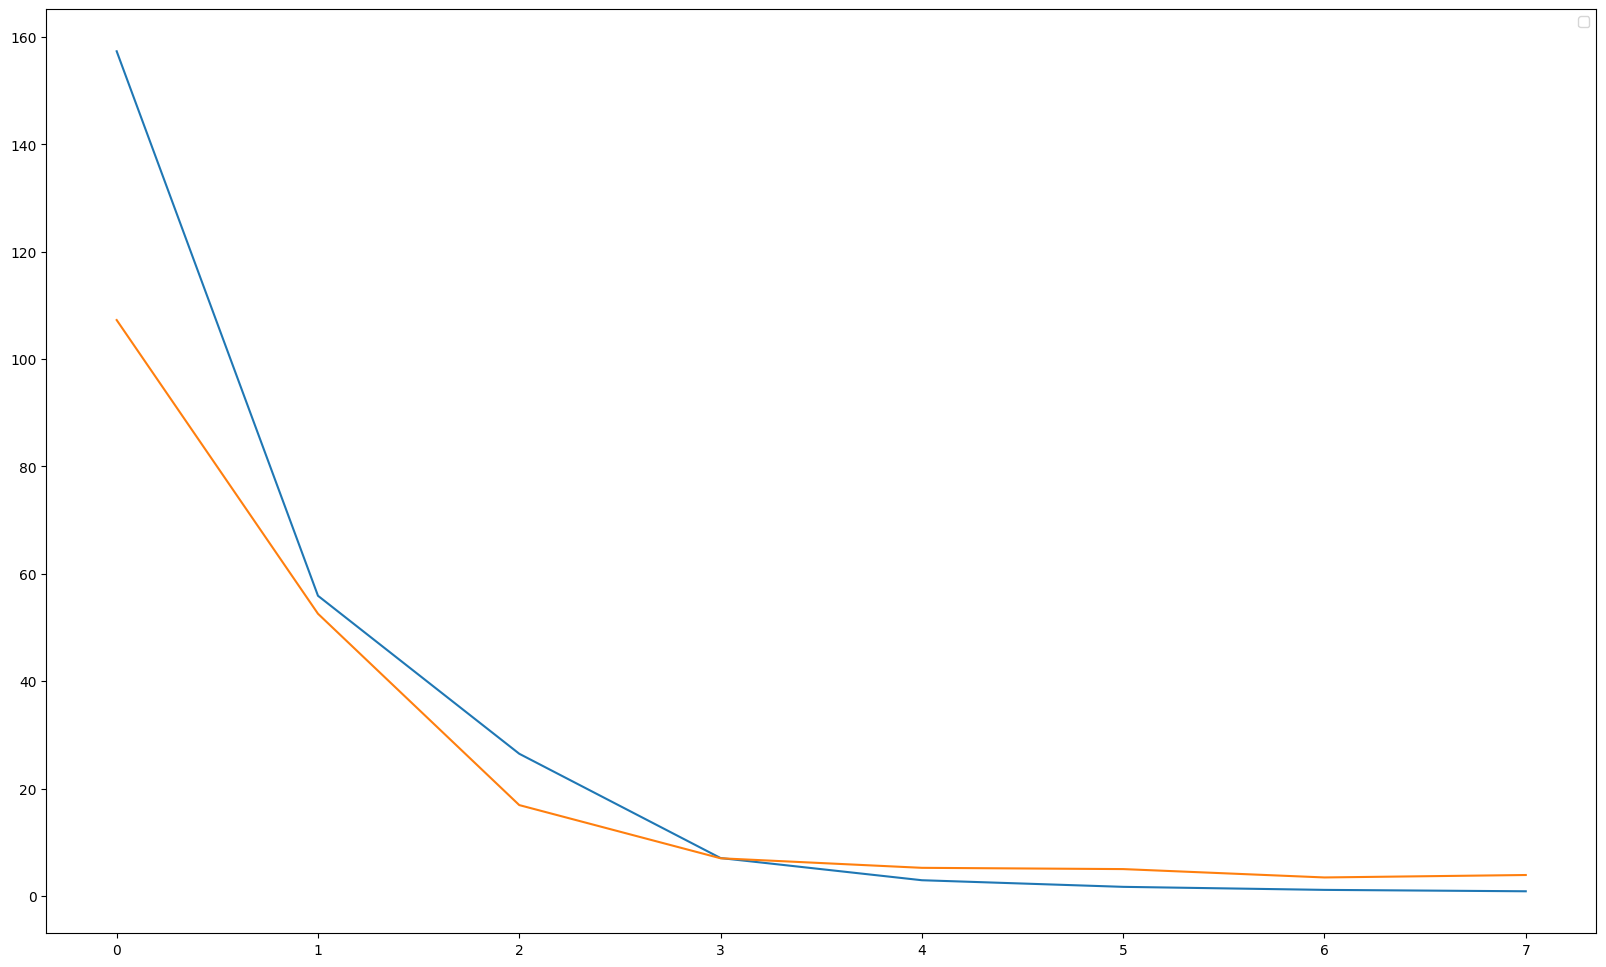

In [131]:
plt.figure(figsize=(20,12))
plt.plot(history.history["loss"][2:10])
plt.plot(history.history["val_loss"][2:10])
plt.legend()

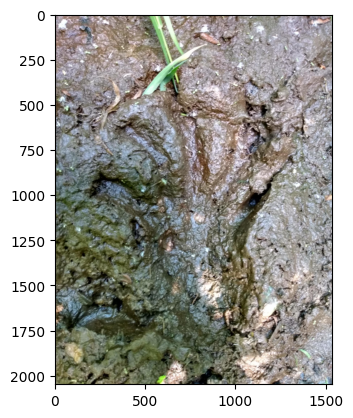

In [132]:
plt.imshow(Image.open("/home/shared/Mammiferes/Castor/original.jpeg"))

In [133]:
castor = tf.io.read_file("/home/shared/Mammiferes/Castor/original.jpeg")
castor = tf.image.decode_jpeg(castor, channels=3)
resized_castor = tf.image.resize(castor, [256,256], method="bilinear")

In [134]:
input = tf.expand_dims(
    resized_castor,
    axis = 0
)

In [135]:
input.shape

TensorShape([1, 256, 256, 3])

In [136]:
model.predict(input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


array([[9.9993873e-01, 6.7722590e-06, 6.8153449e-06, 4.9101279e-09,
        8.8427821e-11, 1.3184241e-08, 1.5658019e-08, 2.8761642e-07,
        3.9204569e-05, 7.0601845e-06, 7.0147644e-07, 2.3717485e-07,
        2.7362333e-07]], dtype=float32)

In [137]:
next(iter(val_ds))[0].shape

TensorShape([32, 256, 256, 3])

In [143]:
class_names = train_ds.class_names
print(class_names)

['Castor', 'Chat', 'Chien', 'Coyote', 'Ecureuil', 'Lapin', 'Loup', 'Lynx', 'Ours', 'Puma', 'Rat', 'Raton_laveur', 'Renard']


(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

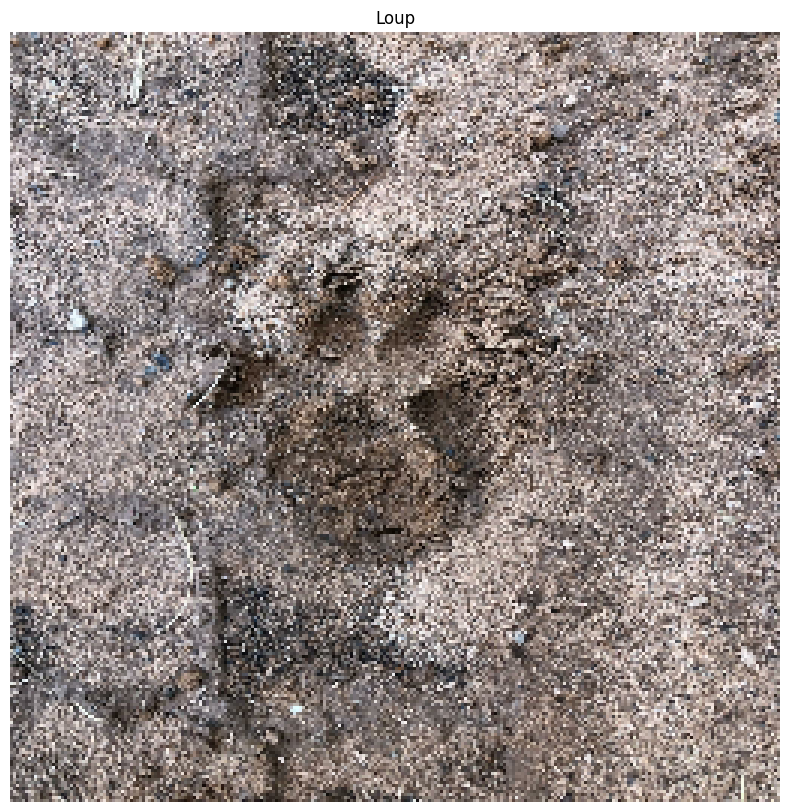

In [182]:
plt.figure(figsize=(10, 10))
batch,_ = val_ds.take(3)
plt.imshow(batch[0][1].numpy().astype("uint8"))
plt.title(class_names[batch[1][1]])
plt.axis("off")
